In [3]:
#Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [4]:
# Step 1: Load Stock Data
ticker = 'AAPL'  # Change to 'TSLA' for Tesla
data = yf.download(ticker, start="2023-01-01", end="2024-07-20")

# Step 2: Feature Engineering
data['Next_Close'] = data['Close'].shift(-1)  # Predict next day's Close
data = data.dropna()  # Drop last row where Next_Close is NaN

# Features and Target
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Next_Close']

C:\Users\DELL\AppData\Local\Temp\ipykernel_10508\1122486136.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2023-01-01", end="2024-07-20")
[*********************100%***********************]  1 of 1 completed


In [5]:
# Train-Test Split (80-20)
split = int(len(data) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Step 3: Train Models
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [6]:
# Step 4: Make Predictions
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

In [7]:
# Evaluation
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))

print(f'Linear Regression RMSE: {lr_rmse:.2f}')
print(f'Random Forest RMSE: {rf_rmse:.2f}')

Linear Regression RMSE: 3.74
Random Forest RMSE: 15.08


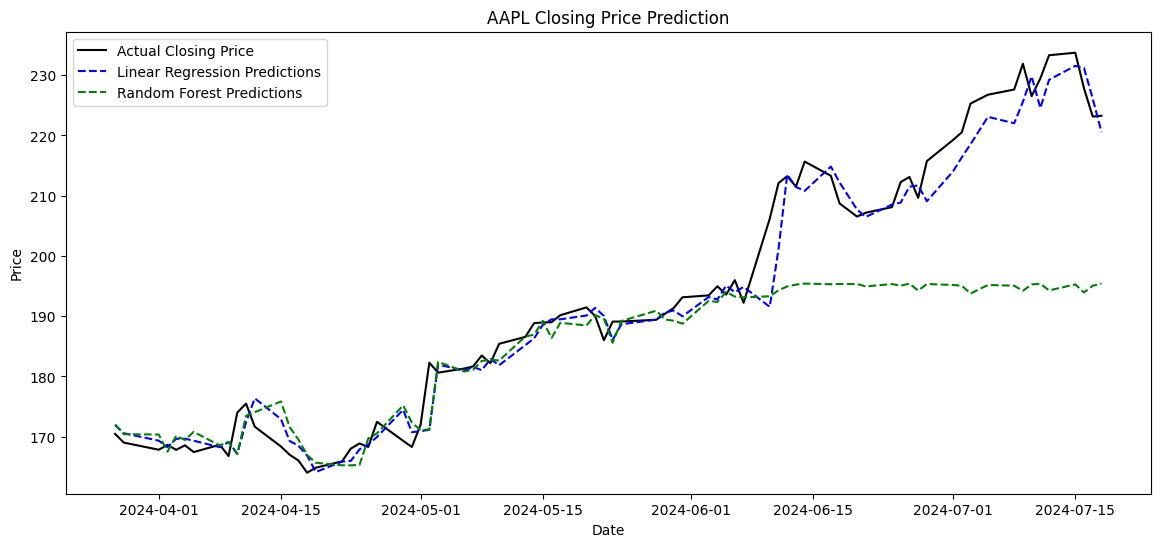

In [8]:
# Step 5: Plot Actual vs Predicted Prices
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label='Actual Closing Price', color='black')
plt.plot(y_test.index, lr_preds, label='Linear Regression Predictions', color='blue', linestyle='--')
plt.plot(y_test.index, rf_preds, label='Random Forest Predictions', color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{ticker} Closing Price Prediction')
plt.legend()
plt.show()

In [10]:
# Step 6: Predict the Next Day's Close (Optional Live Forecast)
latest_data = data.iloc[-1][['Open', 'High', 'Low', 'Volume']].values.reshape(1, -1)
next_day_lr_pred = lr_model.predict(latest_data)[0]
next_day_rf_pred = rf_model.predict(latest_data)[0]

print(f"Predicted Next Close Price (Linear Regression): ${next_day_lr_pred:.2f}")
print(f"Predicted Next Close Price (Random Forest): ${next_day_rf_pred:.2f}")

Predicted Next Close Price (Linear Regression): $220.55
Predicted Next Close Price (Random Forest): $195.41
